In [1]:
from Binaries import *

# Sort by energy

In [2]:
has_labels, has_no_labels = [], []
energies = ["16_16.5", "16.5_17", "17_17.5", "17.5_18", "18_18.5", "18.5_19", "19_19.5"]

for i, energy in enumerate(energies, 1):

    print(f"\nAnalysing energy {i}/{len(energies)}")

    has_label, has_no_label = [], []
    RandomTraces = EventGenerator([energy], split = 1, prior = 0.5, real_background = True, force_inject = 0)

    for batch, (traces, labels, metadata) in enumerate(RandomTraces, 1):

        print(f"Fetching batches {100 * (batch/RandomTraces.__len__()):.2f}%...", end ="\r")

        for integral, (label, _, _, _) in metadata:

            has_label.append(integral) if label else has_no_label.append(integral)

    has_labels.append(has_label)
    has_no_labels.append(has_no_label)


Analysing energy 1/7
Fetching batches 100.00%...
Analysing energy 2/7
Fetching batches 100.00%...
Analysing energy 3/7
Fetching batches 100.00%...
Analysing energy 4/7
Fetching batches 100.00%...
Analysing energy 5/7
Fetching batches 100.00%...
Analysing energy 6/7
Fetching batches 100.00%...
Analysing energy 7/7


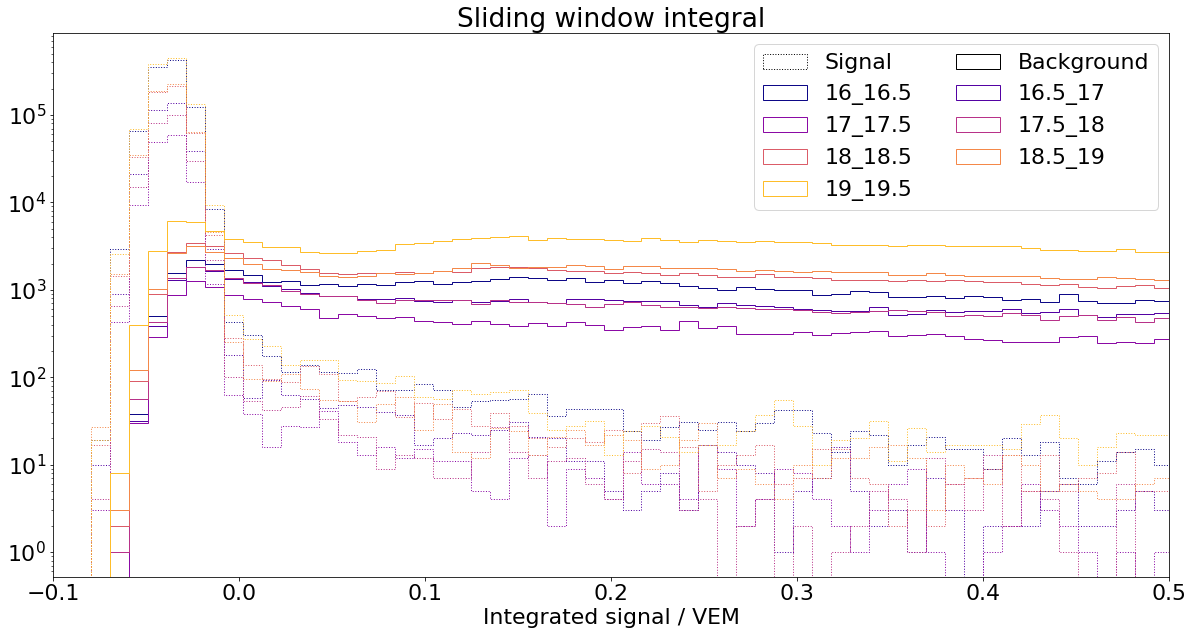

In [14]:
plt.title("Sliding window integral")
map = cmap.get_cmap('plasma')

n_sigs, n_bkgs = [], []
plt.hist([], histtype = "step", ls = ":", label = "Signal", color = "k")
plt.hist([], histtype = "step", ls = "solid", label = "Background", color = "k")

for i, (has_label, has_no_label) in enumerate(zip(has_labels, has_no_labels)):
    
    n_bkg, bins, _ = plt.hist(has_no_label, bins = 500, histtype = "step", range = (-0.1,5), ls = ":", color = map(i / len(energies)))
    n_sig, bins, _ = plt.hist(has_label, bins = 500, histtype = "step", range = (-0.1,5), ls = "solid", color = map(i / len(energies)))
    plt.hist([], histtype = "step", ls = "solid", color = map(i / len(energies)), label =  f"{energies[i]}")

    # label = f"{energies[i]}: n = {len(has_no_label)}"
    # label = f"{energies[i]}: n = {len(has_label)}", 

    n_bkgs.append(n_bkg)
    n_sigs.append(n_sig)

plt.xlim(-0.1, 5)
plt.xlabel("Integrated signal / VEM")
plt.yscale("log")

handles, labels = plt.gca().get_legend_handles_labels()
handles = np.concatenate((handles[::2],handles[1::2]),axis=0)
labels = np.concatenate((labels[::2],labels[1::2]),axis=0)

plt.legend(handles, labels, ncol = 2)

/tmp/ipykernel_3036517/462515174.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/462515174.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/462515174.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/462515174.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/462515174.py:

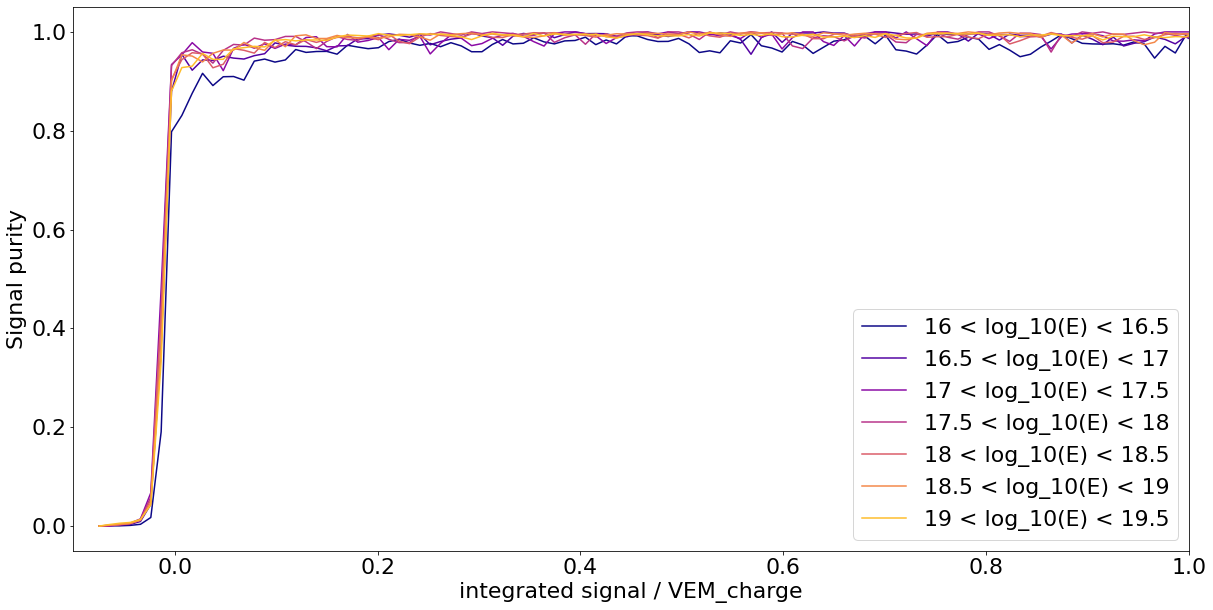

In [8]:
for i, energy in enumerate(energies):

    n_sig = n_sigs[i]
    n_bkg = n_bkgs[i]
    c = map(i / len(energies))

    plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")

plt.ylabel("Signal purity")
plt.xlabel("integrated signal / VEM_charge")
plt.xlim(-0.1, 5)
plt.legend()

# simulated baseline + background

In [5]:
has_labels, has_no_labels = [], []
energies = ["16_16.5", "16.5_17", "17_17.5", "17.5_18", "18_18.5", "18.5_19", "19_19.5"]

for i, energy in enumerate(energies, 1):

    print(f"\nAnalysing energy {i}/{len(energies)}")

    has_label, has_no_label = [], []
    RandomTraces = EventGenerator([energy], split = 1, prior = 0.5)

    for batch, (traces, labels, metadata) in enumerate(RandomTraces, 1):

        print(f"Fetching batches {100 * (batch/RandomTraces.__len__()):.2f}%...", end ="\r")

        for integral, (label, _, _, _) in metadata:

            has_label.append(integral) if label else has_no_label.append(integral)

    has_labels.append(has_label)
    has_no_labels.append(has_no_label)


Analysing energy 1/7
Fetching batches 100.00%...
Analysing energy 2/7
Fetching batches 100.00%...
Analysing energy 3/7
Fetching batches 100.00%...
Analysing energy 4/7
Fetching batches 100.00%...
Analysing energy 5/7
Fetching batches 100.00%...
Analysing energy 6/7
Fetching batches 100.00%...
Analysing energy 7/7


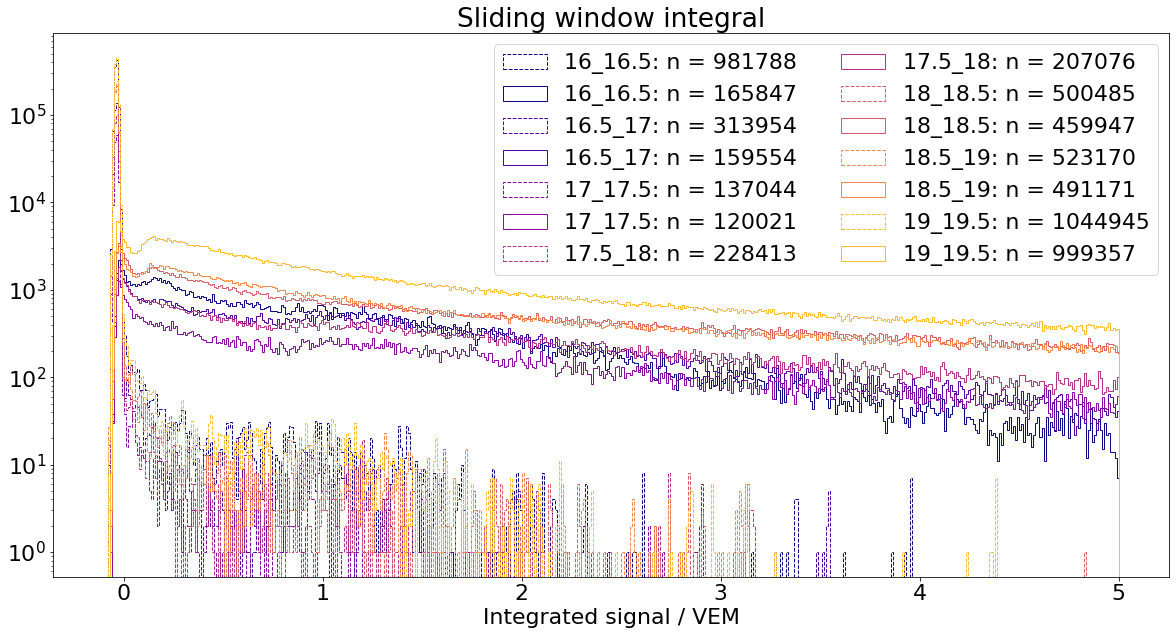

In [6]:
plt.title("Sliding window integral")
map = cmap.get_cmap('plasma')

n_sigs, n_bkgs = [], []
# plt.plot([],[], ls = "--", label = "Signal")
# plt.plot([],[], ls = "solid", label = "Background")

for i, (has_label, has_no_label) in enumerate(zip(has_labels, has_no_labels)):
    
    n_bkg, bins, _ = plt.hist(has_no_label, bins = 500, histtype = "step", label = f"{energies[i]}: n = {len(has_no_label)}", range = (-0.1,5), ls = "--", color = map(i / len(energies)))
    n_sig, bins, _ = plt.hist(has_label, bins = 500, histtype = "step", label = f"{energies[i]}: n = {len(has_label)}", range = (-0.1,5), ls = "solid", color = map(i / len(energies)))

    n_bkgs.append(n_bkg)
    n_sigs.append(n_sig)

plt.xlabel("Integrated signal / VEM")
plt.yscale("log")
plt.legend(ncol = 2)

/tmp/ipykernel_3036517/450658020.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/450658020.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/450658020.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/450658020.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")
/tmp/ipykernel_3036517/450658020.py:

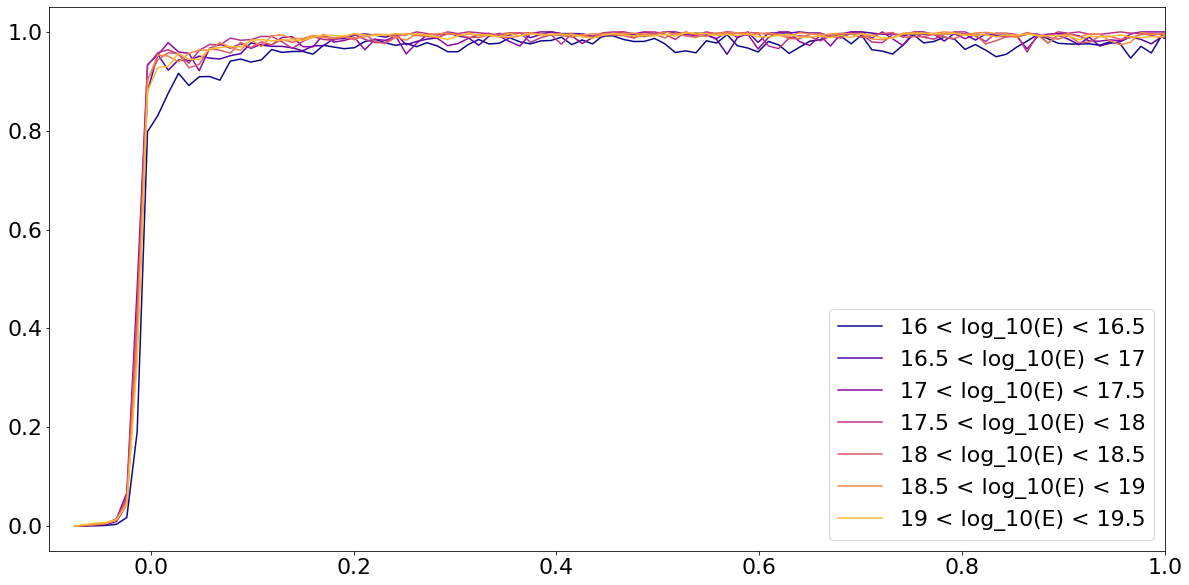

In [7]:
for i, energy in enumerate(energies):

    n_sig = n_sigs[i]
    n_bkg = n_bkgs[i]
    c = map(i / len(energies))

    plt.plot(0.5 * (bins[1:] + bins[:-1]), n_sig / (n_sig + n_bkg), c = c, label = f"{energy.split('_')[0]} < log_10(E) < {energy.split('_')[1]}")

plt.xlim(-0.1, 1)
plt.legend()